In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from evaluation import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

# Z_B vs Z_spec

In [4]:
def redshift_metrics_z_b(predictions):
    classes = np.unique(predictions['CLASS'])
    reports = [('CLASS', 'Z_B', 'spec. subsets'), ('CLASS_PHOTO', 'Z_B', 'photo subsets')]
    for class_col, z_photo_col, name in reports:
        print(name)
        # Standard metrics
        metrics = [('MSE', mean_squared_error), ('R2', r2_score),
                   ('rel. error', relative_err_mean), ('rel. error std', relative_err_std)]
        for metric_name, metric_func in metrics:
            score = np.around(metric_func(predictions['Z'], predictions[z_photo_col]), 4)
            print('{metric_name}: {score}'.format(metric_name=metric_name, score=score))

            # Divided for classes
            if class_col not in predictions:
                continue
            scores = np.around(metric_class_split(predictions['Z'], predictions[z_photo_col], metric=metric_func,
                                                  classes=predictions[class_col]), 4)
            print(', '.join(['{class_name}: {score}'.format(class_name=class_name, score=score) for class_name, score in
                             zip(classes, scores)]))

In [5]:
def z_b_vs_z_spec(predictions, test_subset=None):
    if test_subset:
        mask = predictions['test_subset'] == test_subset
        predictions = predictions.loc[mask]
    redshift_metrics_z_b(predictions)

In [6]:
predictions = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-12-05_12:32:30.csv')
predictions = add_kids_columns(predictions)

In [7]:
z_b_vs_z_spec(predictions, test_subset='top')

spec. subsets
MSE: 1.2345
GALAXY: 0.022, QSO: 3.5972, STAR: 4.3139
R2: -1.1481
GALAXY: -1.1049, QSO: -7.0101, STAR: -25890789.0807
rel. error: 0.0537
GALAXY: 0.0516, QSO: -0.447, STAR: 0.9114
rel. error std: 0.755
GALAXY: 0.0794, QSO: 0.3248, STAR: 1.8669
photo subsets
MSE: 1.2345
GALAXY: 0.0367, QSO: 3.6205, STAR: 4.2874
R2: -1.1481
GALAXY: -0.4926, QSO: -6.545, STAR: -24.5887
rel. error: 0.0537
GALAXY: 0.0514, QSO: -0.4325, STAR: 0.8281
rel. error std: 0.755
GALAXY: 0.0859, QSO: 0.3632, STAR: 1.8651


In [8]:
z_b_vs_z_spec(predictions, test_subset='random')

spec. subsets
MSE: 0.3787
GALAXY: 0.0171, QSO: 3.0175, STAR: 0.333
R2: -0.1803
GALAXY: 0.563, QSO: -2.8651, STAR: -2463331.4057
rel. error: 0.0312
GALAXY: 0.0554, QSO: -0.3794, STAR: 0.1437
rel. error std: 0.3308
GALAXY: 0.0952, QSO: 0.4256, STAR: 0.559
photo subsets
MSE: 0.3787
GALAXY: 0.021, QSO: 3.034, STAR: 0.3592
R2: -0.1803
GALAXY: 0.4971, QSO: -3.1134, STAR: -9.9463
rel. error: 0.0312
GALAXY: 0.0558, QSO: -0.3903, STAR: 0.1399
rel. error std: 0.3308
GALAXY: 0.0982, QSO: 0.4191, STAR: 0.5603


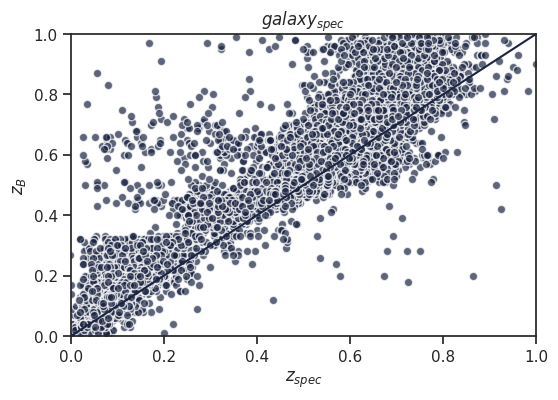

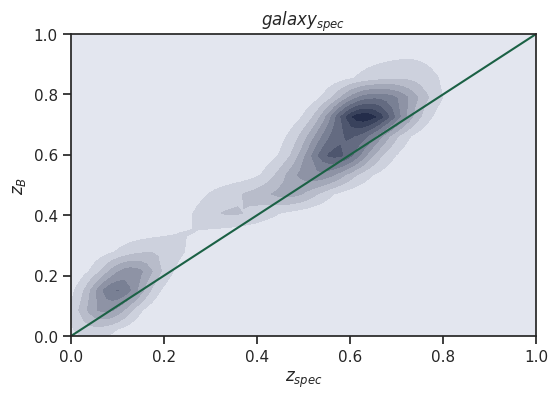

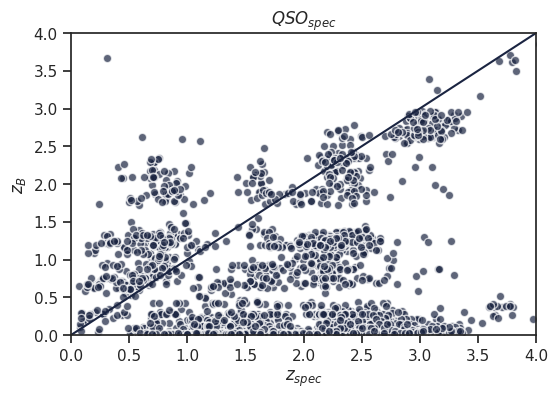

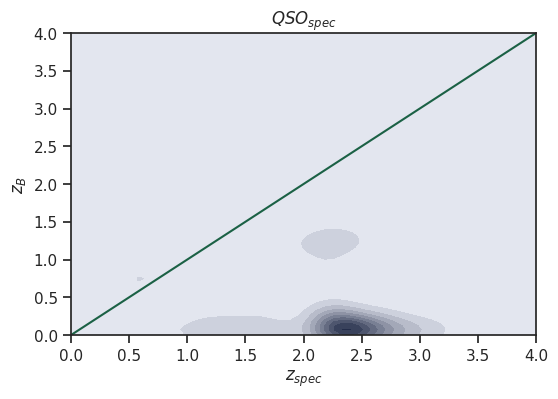

In [9]:
plot_z_true_vs_pred(predictions, 'Z_B', z_max=4)

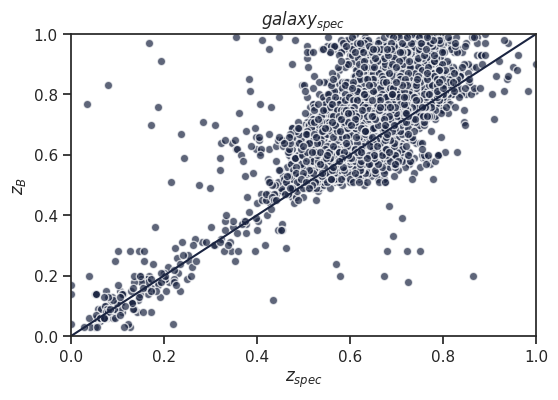

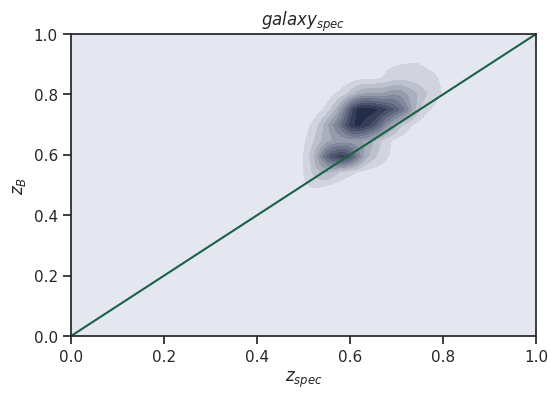

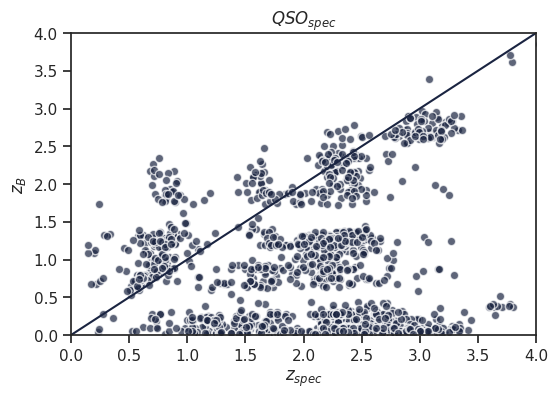

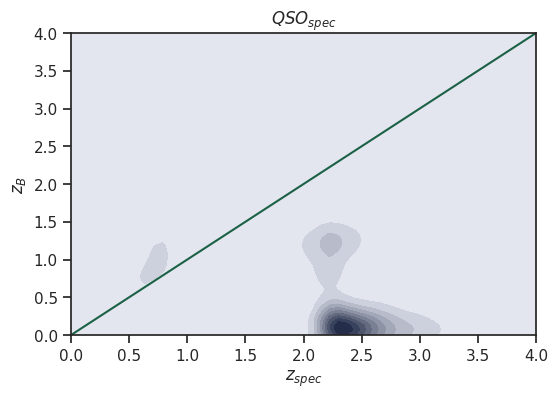

In [11]:
plot_z_true_vs_pred(predictions.loc[predictions['test_subset'] == 'top'], 'Z_B', z_max=4)

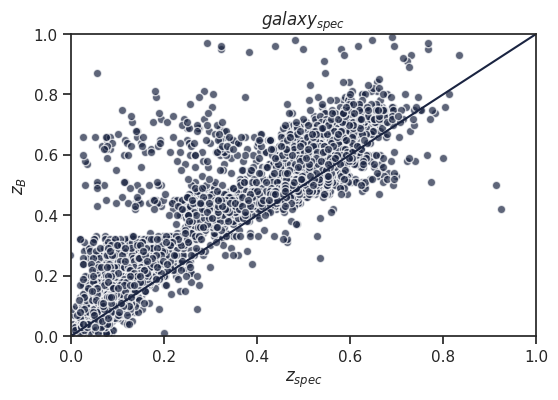

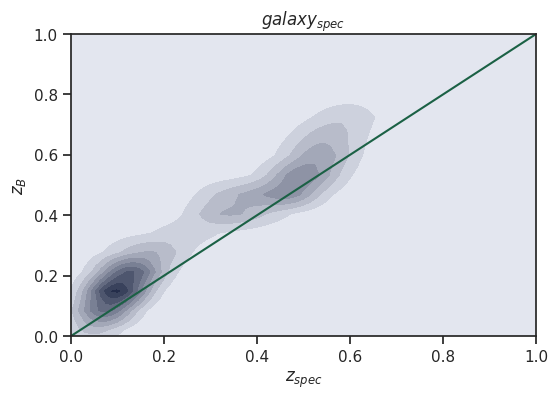

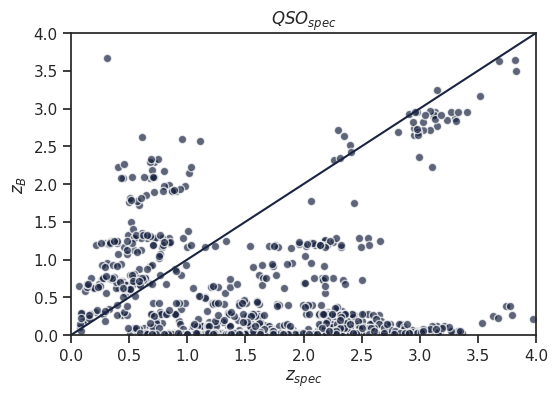

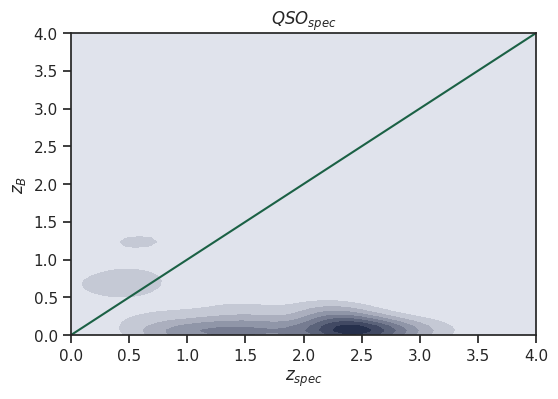

In [12]:
plot_z_true_vs_pred(predictions.loc[predictions['test_subset'] == 'random'], 'Z_B', z_max=4)

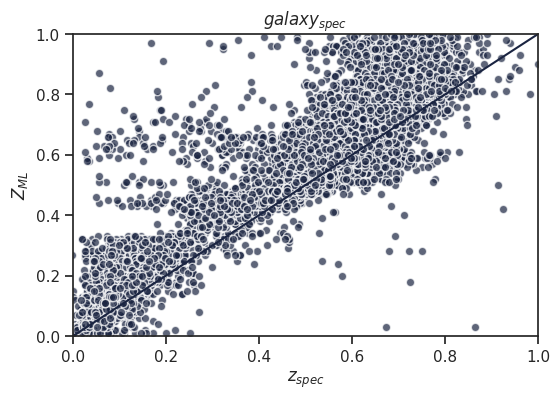

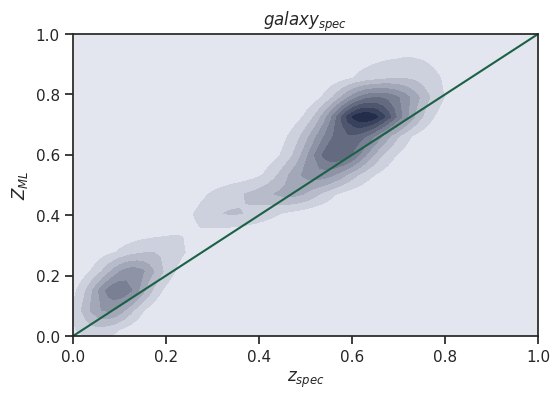

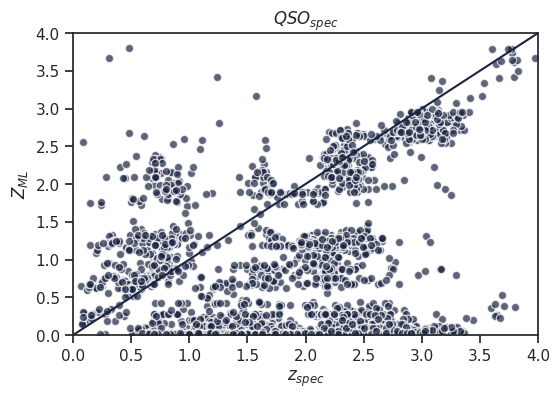

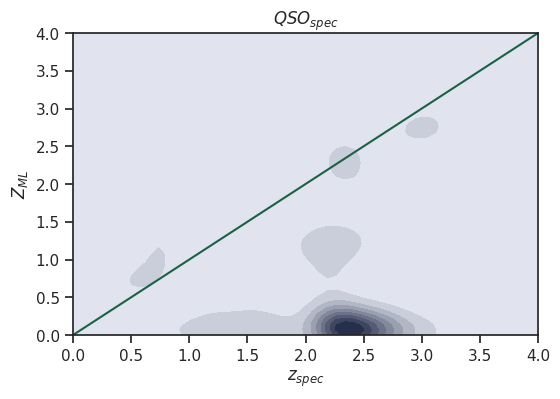

In [10]:
plot_z_true_vs_pred(predictions, 'Z_ML', z_max=4)